For this project I will be working on the CIFAR-10 dataset described here: https://www.cs.toronto.edu/~kriz/cifar.html

Specfically, I am building a classifier using all three of:
- Multinomial logistic regression
- Random Forest
- Convolutional Neural Net

I will then explore the accuracy of each classifier and compare them.

### Data Load

In [ ]:
# This code will allow you to permanently save the model into your google drive account. 
# You will see all your google drive files if you click the folder icon on the left. You can right click to get the path of any file as well as to save models. 

#This cell will only work in colab!
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Here are my imports
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import time
from datetime import timedelta
import math
import os
import keras
from sklearn import neighbors, ensemble, datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.utils import np_utils
import multiprocessing as mp

In [ ]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

## Look at some plots 

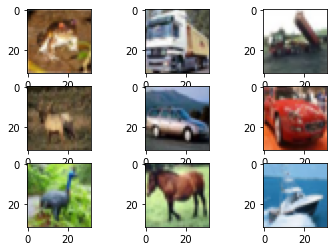

In [ ]:
from matplotlib import pyplot

# Plot a few images: 
 # plot first few images
for i in range(9):
    # define subplot
    pyplot.subplot(330+1+ i)
    # plot raw pixel data
    pyplot.imshow(x_train[i])
# show the figure
pyplot.show()

In [ ]:
for i in range(9):
    print(labels[int(y_train[i])])

frog
truck
truck
deer
automobile
automobile
bird
horse
ship


In [ ]:
#Reshape the data for classification algorithms
x_train = x_train.reshape((50000, 3072))
y_train = list(y_train.flatten())

x_test = x_test.reshape((10000, 3072))
y_test = list(y_test.flatten())

In [ ]:
# Random Forest Algorithm

clf = ensemble.RandomForestClassifier(n_estimators = 100)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.4724
              precision    recall  f1-score   support

           0       0.54      0.57      0.56      1000
           1       0.53      0.56      0.54      1000
           2       0.37      0.33      0.35      1000
           3       0.34      0.28      0.31      1000
           4       0.40      0.39      0.40      1000
           5       0.43      0.40      0.41      1000
           6       0.48      0.58      0.52      1000
           7       0.51      0.45      0.47      1000
           8       0.59      0.61      0.60      1000
           9       0.49      0.56      0.52      1000

    accuracy                           0.47     10000
   macro avg       0.47      0.47      0.47     10000
weighted avg       0.47      0.47      0.47     10000

[[568  44  58  14  36  21  17  28 153  61]
 [ 27 564  23  33  20  25  42  30  60 176]
 [105  46 334  79 146  59 123  61  24  23]
 [ 54  44  78 275  76 185 143  56  20  69]
 [ 51  27 152  58 394  43 136  93  26  20]
 [ 30  30  81 153  

### Random Forest Algorithm: 47% Accuracy

In [ ]:
# Multinomial Logistic Regression Algorithm
clf = LogisticRegression(n_jobs = 5, solver='lbfgs', multi_class='multinomial').fit(x_train, y_train)

y_pred = clf.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.4024
              precision    recall  f1-score   support

           0       0.42      0.48      0.45      1000
           1       0.46      0.49      0.47      1000
           2       0.33      0.27      0.30      1000
           3       0.31      0.26      0.28      1000
           4       0.36      0.29      0.32      1000
           5       0.33      0.34      0.34      1000
           6       0.43      0.48      0.46      1000
           7       0.45      0.44      0.45      1000
           8       0.46      0.52      0.49      1000
           9       0.42      0.45      0.43      1000

    accuracy                           0.40     10000
   macro avg       0.40      0.40      0.40     10000
weighted avg       0.40      0.40      0.40     10000

[[484  46  56  41  22  30  22  50 176  73]
 [ 62 486  14  32  22  35  35  52  95 167]
 [121  44 272  85 112  93 136  68  48  21]
 [ 43  56  99 257  52 192 121  54  48  78]
 [ 65  23 133  58 289  95 148 125  33  31]
 [ 51  46  88 151  

### Multinomial Logistic Regression: 40% Accuracy

In [14]:
# Setup for my neural network
num_classes = 10
epochs = 50 
data_augmentation = True

# Reset x_train and y_train
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data() 
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# One hot encoding
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255
x_test /= 255

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [15]:
# Here is my neural net 
def Net():
    model = Sequential()
    model.add(Dense(16, input_shape=x_train.shape[1:]))
    model.add(Conv2D(25,(5, 5)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    model.compile(optimizer = "adam", loss='categorical_crossentropy', metrics=['accuracy'])
    return model
neural_net = Net()
neural_net.summary()
# Now we fit and run
my_Net = neural_net.fit(x_train, y_train, batch_size=25, epochs=epochs, validation_data=(x_test,y_test),shuffle=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32, 32, 16)        64        
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 25)        10025     
                                                                 
 activation (Activation)     (None, 28, 28, 25)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 25)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4900)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                49010     
                                                        

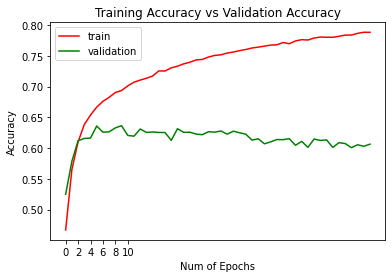

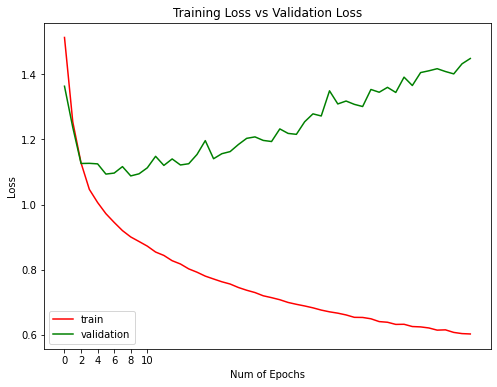

Accuracy: 60.63%


In [16]:
# After we run the code above, we can plot our data here 
plt.figure(0)
plt.plot(my_Net.history['accuracy'],'r')
plt.plot(my_Net.history['val_accuracy'],'g')
plt.xticks(np.arange(0, 11, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])

plt.figure(1)
plt.plot(my_Net.history['loss'],'r')
plt.plot(my_Net.history['val_loss'],'g')
plt.xticks(np.arange(0, 11, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
plt.show()
# Show our final accuracy 
scores = neural_net.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

### Neural Net Accuracy: 60.83%

### Analysis
- First we can look at our Random Forest Algorithm. After running the code, we got a percentage of 47% which is not too bad, but can be much better. With data as large as this, we can see the disadvantages of our previously learned classification algorithms such as this, KNN, and Logistic Regression.
- After performing multinomial logistic regression, we got an accuracy of 40% which is even lower than Random Forest. In this case I think our final model had stronger trees in the forest and the correlation between them comapred to the regression model. 
- Finally, we demonstrated that a convolutional neural net performed much better compared to these two with an accuracy just over 60%. Once the iterations were done, I graphed the training accuracy vs validation accuracy and the training loss vs Validation loss which gives a nice visual towards what we made.
- Overall, after seeing these various models, we can see how neural networks drastically perform better in these situations in comparison to our other classification algorithms which is something that I found to be very interesting. 